In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# !pip install kaggle
# !mkdir -p ~/.kaggle
# !cp drive/MyDrive/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d mlg-ulb/creditcardfraud
# !cp /content/creditcardfraud.zip drive/MyDrive


In [2]:
!mkdir dataset
!unzip drive/MyDrive/creditcardfraud.zip -d dataset


Archive:  drive/MyDrive/creditcardfraud.zip
  inflating: dataset/creditcard.csv  


In [11]:
import pandas as pd
df=pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


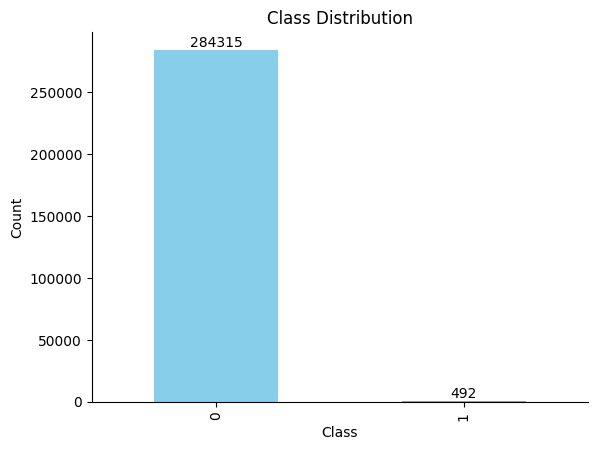

In [12]:
from matplotlib import pyplot as plt

df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.gca().spines[['top', 'right']].set_visible(False)

for index, value in enumerate(df['Class'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.show()


In [13]:
import plotly.graph_objects as go

colors = ['#FFD700', '#AFEEEE']
labels = ['Normal', 'Fraud']
values = df['Class'].value_counts() / df['Class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)

fig.show()


## train test

In [14]:
# from sklearn.model_selection import train_test_split
# X=df.drop('Class',axis=1)
# y=df['Class']
# X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Epoch 1/10
1781/1781 [==============================] - 5s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

7121/7121 [==============================] - 64s 9ms/step - loss: 0.2814 - accuracy: 0.8863 - val_loss: 0.0403 - val_accuracy: 0.9983
Epoch 2/10
  19/7121 [..............................] - ETA: 42s - loss: 0.0636 - accuracy: 0.9984

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 4s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.33      0.47        98

    accuracy                           1.00     56962
   macro avg       0.91      0.66      0.73     56962
weighted avg       1.00      1.00      1.00     56962

7121/7121 [==============================] - 58s 8ms/step - loss: 0.0286 - accuracy: 0.9981 - val_loss: 0.0151 - val_accuracy: 0.9987
Epoch 3/10
1781/1781 [==============================] - 3s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.76      0.78        98

    accuracy                           1.00     56962
   macro avg       0.90      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962

7121/7121 [============================

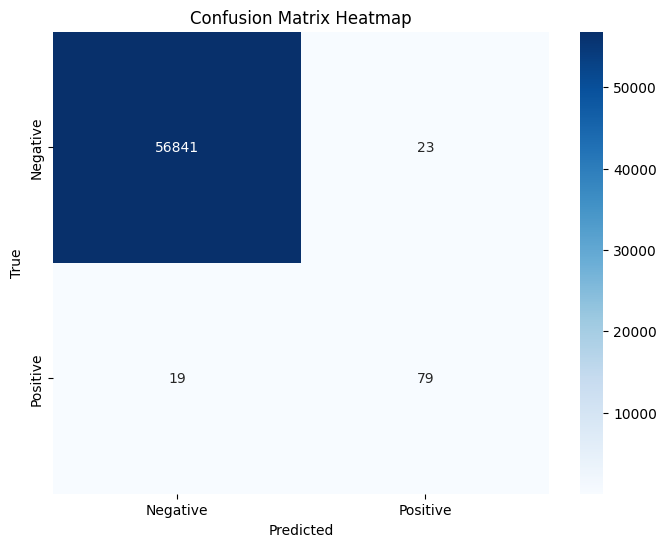

In [15]:
#1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

label_column = 'Class'

X = df.drop(label_column, axis=1)
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5))

model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(rate=0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

model.add(BatchNormalization(momentum=0.9, epsilon=1e-5))

model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

custom_optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(X_test)
        y_pred_classes = np.round(y_pred)
        classification_rep = classification_report(y_test, y_pred_classes)
        print("\nClassification Report:")
        print(classification_rep)

history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[MetricsCallback()])
model.save("ali11.keras")

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

plot_confusion_matrix(y_test, y_pred_classes)


In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()



#Adasyn algorithm implementation

In [17]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors


IR = len(df[df['Class'] == 0]) / len(df[df['Class'] == 1])

SyntheticSamples = int(IR * len(df[df['Class'] == 1]))
def estimate_density_distribution(minority_instance, majority_instances):
    knn = NearestNeighbors(n_neighbors=5)
    knn.fit(majority_instances)
    distances, _ = knn.kneighbors(minority_instance.reshape(1, -1))
    return np.mean(distances)
def generate_synthetic_sample(minority_instance, nearest_majority_instance):
    alpha = np.random.random()
    synthetic_sample = minority_instance + alpha * (nearest_majority_instance - minority_instance)
    return synthetic_sample
def find_nearest_majority_instance(minority_instance, majority_instances):
    knn = NearestNeighbors(n_neighbors=1)
    knn.fit(majority_instances)
    _, indices = knn.kneighbors(minority_instance.reshape(1, -1))
    nearest_majority_instance = majority_instances[indices.flatten()]
    return nearest_majority_instance

synthetic_samples = []
minority_instances = df[df['Class'] == 1].values
majority_instances = df[df['Class'] == 0].values

for minority_instance in minority_instances:
    nearest_majority_instance = find_nearest_majority_instance(minority_instance, majority_instances)
    synthetic_sample = generate_synthetic_sample(minority_instance, nearest_majority_instance)
    synthetic_samples.append(synthetic_sample)

synthetic_df = pd.DataFrame(np.array(synthetic_samples), columns=df.columns[:-1])

df_resampled = pd.concat([df, synthetic_df], axis=0, ignore_index=True)

print(df_resampled.head())


In [18]:
import plotly.graph_objects as go

colors = ['#FFD700', '#AFEEEE']
labels = ['Normal', 'Fraud']
values = df_resampled['Class'].value_counts() / df_resampled['Class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)

fig.show()


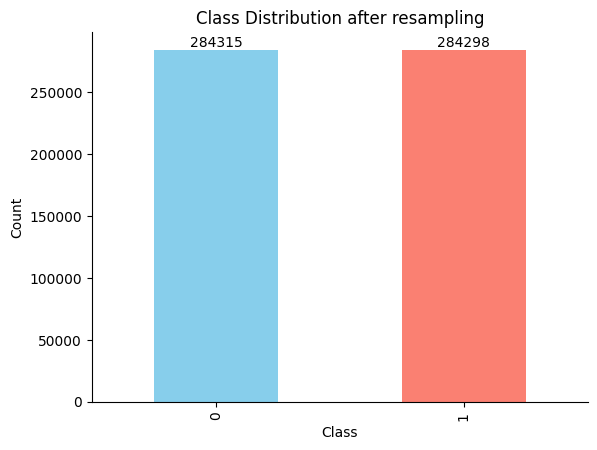

In [21]:
from matplotlib import pyplot as plt

df_resampled['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], title='Class Distribution after resampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.gca().spines[['top', 'right']].set_visible(False)

for index, value in enumerate(df_resampled['Class'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.show()


In [26]:
X_test = np.squeeze(X_test)
X_test.shape

(56962, 30)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

label_column = 'Class'

X = df_resampled.drop(label_column, axis=1)
y = df_resampled[label_column]

X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30, 1)))

model.add(BatchNormalization(momentum=0.9, epsilon=1e-5))

model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(rate=0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

model.add(BatchNormalization(momentum=0.9, epsilon=1e-5))

model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
custom_optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(X_test)
        y_pred_classes = np.round(y_pred)
        f1 = f1_score(y_test, y_pred_classes)
        cm = confusion_matrix(y_test, y_pred_classes)
        print(f"\nF1 Score: {f1}")
        print("Confusion Matrix:")
        print(cm)

history2=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[MetricsCallback()])
model.save('ali.h5')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Epoch 1/10
1781/1781 [==============================] - 4s 2ms/step

F1 Score: 0.31307550644567217
Confusion Matrix:
[[56504   360]
 [   13    85]]
14216/14216 [==============================] - 108s 7ms/step - loss: 0.2730 - accuracy: 0.8910 - val_loss: 0.0442 - val_accuracy: 0.9935
Epoch 2/10
1781/1781 [==============================] - 3s 2ms/step

F1 Score: 0.38222222222222224
Confusion Matrix:
[[56598   266]
 [   12    86]]
14216/14216 [==============================] - 100s 7ms/step - loss: 0.1463 - accuracy: 0.9508 - val_loss: 0.0403 - val_accuracy: 0.9951
Epoch 3/10
1781/1781 [==============================] - 3s 2ms/step

F1 Score: 0.3208955223880597
Confusion Matrix:
[[56512   352]
 [   12    86]]
14216/14216 [==============================] - 104s 7ms/step - loss: 0.1238 - accuracy: 0.9583 - val_loss: 0.0532 - val_accuracy: 0.9936
Epoch 4/10
1781/1781 [==============================] - 3s 2ms/step

F1 Score: 0.35684647302904565
Confusion Matrix:
[[56566   298]
 [   12    86]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [28]:
model.save('ali.keras')

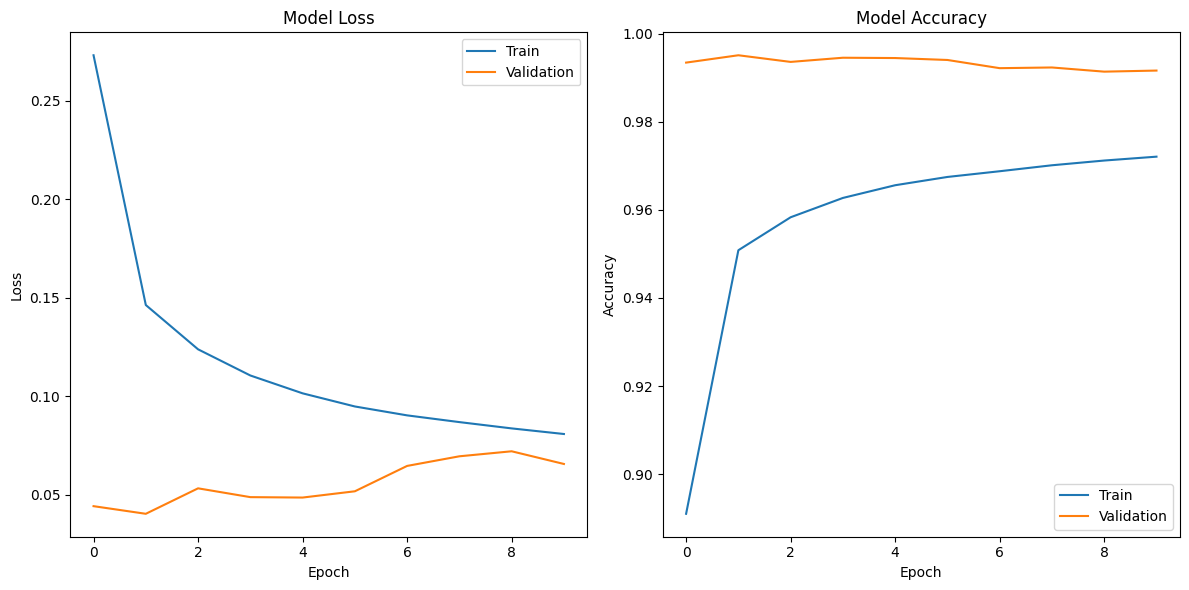

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()



In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_final = np.round(y_pred_probs)
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final Confusion Matrix')
plt.show()
